# Portfolio with the Maximum Calmar Ratio for the Banking Sector 

In [5]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Establishing Dates
start = "2017-01-01"
end = "2021-1-1"

# Establishing Assets
assets =['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS',
        'INDUSINDBK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS' ]


#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS   SBIN.NS  \
Date                                                                         
2017-01-03    -0.006033      0.009677     -0.004276     0.016612  0.005322   
2017-01-04    -0.003705     -0.013057     -0.022952    -0.004734 -0.008200   
2017-01-05     0.000590      0.024197      0.004804     0.010865  0.010036   
2017-01-06     0.006261      0.003492      0.025287    -0.006241  0.002239   
2017-01-09     0.001297      0.002128     -0.010658    -0.005397  0.004666   
...                 ...           ...           ...          ...       ...   
2020-12-28     0.011210      0.012674      0.014331     0.012135  0.030811   
2020-12-29     0.010106      0.016589      0.005215     0.020115  0.009763   
2020-12-30     0.003707     -0.000095      0.009285    -0.008126 -0.003605   
2020-12-31     0.002649      0.011844     -0.011137    -0.007467 -0.007067   
2021-01-01    -0.007863     -0.014211     -0.000777     0.005385  0.016055   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
Date                                                     
2017-01-03       0.012020       0.001513      -0.000823  
2017-01-04      -0.000409      -0.006065      -0.014091  
2017-01-05       0.024601       0.026268       0.012443  
2017-01-06       0.014527      -0.004454       0.000000  
2017-01-09       0.013199       0.016968       0.020401  
...                   ...            ...            ...  
2020-12-28       0.016456       0.033186       0.028828  
2020-12-29       0.051645       0.000000      -0.006789  
2020-12-30      -0.015288      -0.002228      -0.001363  
2020-12-31      -0.004571      -0.008212       0.010855  
2021-01-01       0.005794       0.020038       0.009402  

[988 rows x 8 columns]

In [7]:
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
df = df.copy()

for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    ### daily return of the portfolio based on a given set of weights
    df['portfolio_ret'] = df.iloc[:,0]*weights[0]+df.iloc[:,1]*weights[1]+df.iloc[:,2]*weights[2]
  
                       
    # Calculating mean
    E = df['portfolio_ret'].mean()
    
    
    # Annualizing mean
    E = E*252
    

    
    # Calculating Drawdown
    def max_drawdown(return_series):
        comp_ret = (return_series+1).cumprod()
        peak = comp_ret.expanding(min_periods=1).max()
        dd = 1 - (comp_ret/peak)
        return dd.max()

    max_drawdown = max_drawdown(df['portfolio_ret'])
   
    #Calculating Annualised Calmar
    Calmar = E / max_drawdown
    
                   
    # Populating the 'result' array with the required values: Mean, Drawdown, Calmar followed by the weights                   
    result[i,0] = E
    result[i,1] = max_drawdown
    result[i,2] = Calmar
    
    for j in range(len(assets)):
        result[i,j+3]= weights[j]

In [9]:
# Converting 'result' into a DataFrame

columns = ['Mean','Drawdown', 'Calmar'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Drawdown    Calmar  HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  \
0     0.133031  0.269487  0.493645     0.239328      0.170756      0.157220   
1     0.096109  0.203821  0.471537     0.118180      0.159854      0.130293   
2     0.100171  0.208709  0.479954     0.001001      0.204225      0.209906   
3     0.084507  0.183808  0.459757     0.103312      0.152635      0.104946   
4     0.103833  0.196875  0.527407     0.203393      0.037138      0.189056   
...        ...       ...       ...          ...           ...           ...   
9995  0.086094  0.186305  0.462117     0.139664      0.136504      0.093099   
9996  0.100118  0.196712  0.508958     0.150696      0.085819      0.179604   
9997  0.045659  0.102996  0.443305     0.153208      0.032851      0.014107   
9998  0.072916  0.172116  0.423646     0.097989      0.175387      0.046232   
9999  0.102623  0.199208  0.515158     0.144620      0.083377      0.196466   

      AXISBANK.NS   SBIN.NS  INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
0        0.089978  0.105599       0.021507       0.155071       0.060541  
1        0.134813  0.058135       0.186388       0.103385       0.108953  
2        0.012184  0.166074       0.141656       0.117492       0.147463  
3        0.159864  0.173467       0.071860       0.161169       0.072747  
4        0.052679  0.181334       0.133311       0.099775       0.103314  
...           ...       ...            ...            ...            ...  
9995     0.180891  0.159588       0.090488       0.128182       0.071584  
9996     0.135776  0.112506       0.106944       0.052399       0.176256  
9997     0.115745  0.277200       0.033987       0.069247       0.303655  
9998     0.190757  0.037219       0.086828       0.076320       0.289268  
9999     0.183241  0.070555       0.118854       0.009974       0.192912  

[10000 rows x 11 columns]

In [10]:
Max_Calmar = result.iloc[result['Calmar'].idxmax()]
Max_Calmar

Mean             0.113485
Drawdown         0.186978
Calmar           0.606944
HDFCBANK.NS      0.007478
ICICIBANK.NS     0.013431
KOTAKBANK.NS     0.415243
AXISBANK.NS      0.169075
SBIN.NS          0.014042
INDUSINDBK.NS    0.305263
FEDERALBNK.NS    0.002667
IDFCFIRSTB.NS    0.072799
Name: 6385, dtype: float64

In [16]:
Min_Drawdown = result.iloc[result['Drawdown'].idxmin()]
Min_Drawdown

Mean             0.005746
Drawdown         0.010443
Calmar           0.550224
HDFCBANK.NS      0.000860
ICICIBANK.NS     0.001620
KOTAKBANK.NS     0.019820
AXISBANK.NS      0.193204
SBIN.NS          0.192426
INDUSINDBK.NS    0.183804
FEDERALBNK.NS    0.165035
IDFCFIRSTB.NS    0.243231
Name: 9627, dtype: float64

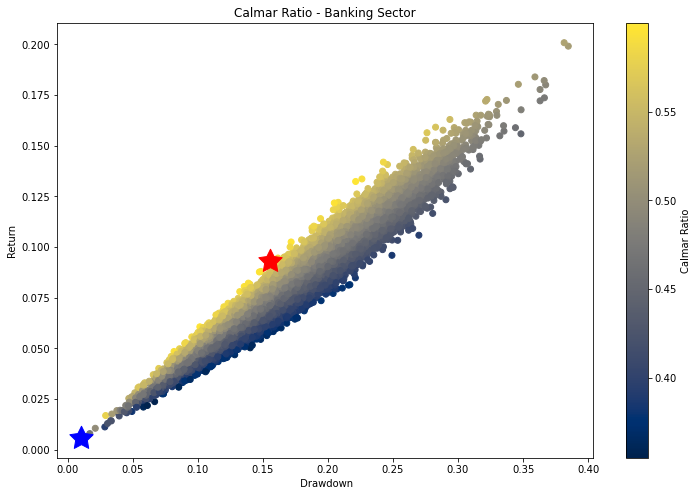

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Drawdown'],y=result['Mean'],c=result['Calmar'],cmap='cividis')
plt.colorbar(label='Calmar Ratio')
plt.xlabel(' Drawdown')
plt.ylabel('Return')

plt.title('Calmar Ratio - Banking Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Calmar[1],Max_Calmar[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_Drawdown[1],Min_Drawdown[0],marker=(5,1,0),color='b',s=600)
plt.show()